In [103]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
df =pd.read_csv('user_text.tsv',sep='\t', names=['Text', 'Date', 'Place', 'Hashtags']) #read tsv file and add colom headers 
df["Date"] = pd.to_datetime(df.Date) #convert dates into appropriate datatype
df = df.sort_values(by=['Date']) # sort the data on the date 
df = df.dropna(subset=['Place'])  # drop rows with missing values in this column




Data after removing Rows without value for Place:

In [104]:
df

,Text,Date,Place,Hashtags
43,"@SteenksRafaela Meid, je weet niet wat je mist...",2021-07-22 00:00:02+02:00,"Leiderdorp, Nederland, Nederland",NaN
89,@Veldhorst__W Als je mij een transcriptie kan ...,2021-07-22 00:00:04+02:00,"Den Haag, Nederland, Nederland",#zinin
75,@VincentWammes @lorelei3112 Je ziet het hier a...,2021-07-22 00:00:04+02:00,"Oost Gelre, Nederland, Nederland",NaN
173,Heerlijk avondje Amsterdam in de grachten. Bij...,2021-07-22 00:00:14+02:00,"Heemstede, Nederland, Nederland",NaN
178,@baara_a Ja zondag vlucht terug. Nog twee dage...,2021-07-22 00:00:15+02:00,"Benalmádena, España, Spanje",NaN
...,...,...,...,...
624381,@Covid19_zwendel @thierrybaudet @YouTube Vanmi...,2021-07-22 23:59:25+02:00,"Den Haag, Nederland, Nederland",NaN
624403,@PeterterHorst @thierrybaudet Ik ken de cijfer...,2021-07-22 23:59:28+02:00,"Oss, Nederland, The Netherlands",NaN
624497,@GoldCup Vlijter 🇸🇷🇸🇷🇸🇷,2021-07-22 23:59:42+02:00,"Den Haag, Nederland, Nederland",NaN
624491,A1 13102 Karel du Jardinstraat Amsterdam Rit 6...,2021-07-22 23:59:42+02:00,"Amsterdam, The Netherlands, The Netherlands",#p2000


In [ ]:
Data after adding totalhashtags of each tweet:

In [105]:
df['totalhashtags'] = df['Hashtags'].str.count(' ') + 1 #count the number of hashtags in a message
df['totalhashtags'] = df['totalhashtags'].fillna(0) #replace each NaN value with 0.0 
df

,Text,Date,Place,Hashtags,totalhashtags
43,"@SteenksRafaela Meid, je weet niet wat je mist...",2021-07-22 00:00:02+02:00,"Leiderdorp, Nederland, Nederland",NaN,0.0
89,@Veldhorst__W Als je mij een transcriptie kan ...,2021-07-22 00:00:04+02:00,"Den Haag, Nederland, Nederland",#zinin,1.0
75,@VincentWammes @lorelei3112 Je ziet het hier a...,2021-07-22 00:00:04+02:00,"Oost Gelre, Nederland, Nederland",NaN,0.0
173,Heerlijk avondje Amsterdam in de grachten. Bij...,2021-07-22 00:00:14+02:00,"Heemstede, Nederland, Nederland",NaN,0.0
178,@baara_a Ja zondag vlucht terug. Nog twee dage...,2021-07-22 00:00:15+02:00,"Benalmádena, España, Spanje",NaN,0.0
...,...,...,...,...,...
624381,@Covid19_zwendel @thierrybaudet @YouTube Vanmi...,2021-07-22 23:59:25+02:00,"Den Haag, Nederland, Nederland",NaN,0.0
624403,@PeterterHorst @thierrybaudet Ik ken de cijfer...,2021-07-22 23:59:28+02:00,"Oss, Nederland, The Netherlands",NaN,0.0
624497,@GoldCup Vlijter 🇸🇷🇸🇷🇸🇷,2021-07-22 23:59:42+02:00,"Den Haag, Nederland, Nederland",NaN,0.0
624491,A1 13102 Karel du Jardinstraat Amsterdam Rit 6...,2021-07-22 23:59:42+02:00,"Amsterdam, The Netherlands, The Netherlands",#p2000,1.0


In [ ]:
Data Belgie:

In [106]:
df['Place'] = df['Place'].str.replace(',','') # replace a , with a whitespace
df_Belgie = df[df['Place'].str.contains('Belgium|Belgie|België')]
df_Belgie


,Text,Date,Place,Hashtags,totalhashtags
299,Wat een slechte federatie😐,2021-07-22 00:00:31+02:00,Antwerpen België België,NaN,0.0
945,TOT MORGEN IEDEREEN SLAAP WARM DONDERDAG https...,2021-07-22 00:02:15+02:00,Gent België België,NaN,0.0
1237,Wat een dag weer ik amuseer mij meer als vrien...,2021-07-22 00:03:01+02:00,Sint-Niklaas België België,NaN,0.0
2664,@HansVerbrugge12 NIET ZO DUIDELIJK,2021-07-22 00:06:32+02:00,Gent België België,NaN,0.0
3219,Oudenaarde ❤️,2021-07-22 00:08:01+02:00,Zingem België België,NaN,0.0
...,...,...,...,...,...
620850,@CasierMaryse @kat_de_ @FranckenTheo Gaan we i...,2021-07-22 23:51:12+02:00,Aarschot België Belgium,NaN,0.0
620966,@vanderhulstje Gestippelde houtvlinder,2021-07-22 23:51:29+02:00,Gent België België,NaN,0.0
621053,@AndyH1983 39 miljoen inwoners. https://t.co/7...,2021-07-22 23:51:41+02:00,Genk Belgium Belgium,NaN,0.0
622292,@GysCeline oooh geniet ervan!! 🥰🥰 (ben sinds v...,2021-07-22 23:54:36+02:00,Antwerp Belgium Belgium,NaN,0.0


In [ ]:
Gemiddeld aantal hastags over alle tweets Belgie:

In [107]:
df_Belgie_averagehashtags = df_Belgie['totalhashtags'].mean()
df_Belgie_averagehashtags

0.29376854599406527

In [ ]:
Dutch Data

In [108]:
df['Place'] = df['Place'].str.replace(',','') # replace a , with a whitespace
df_Nederland = df[df['Place'].str.contains('Nederland|Netherlands')] # search for Nederland in Place
df_Nederland

,Text,Date,Place,Hashtags,totalhashtags
43,"@SteenksRafaela Meid, je weet niet wat je mist...",2021-07-22 00:00:02+02:00,Leiderdorp Nederland Nederland,NaN,0.0
89,@Veldhorst__W Als je mij een transcriptie kan ...,2021-07-22 00:00:04+02:00,Den Haag Nederland Nederland,#zinin,1.0
75,@VincentWammes @lorelei3112 Je ziet het hier a...,2021-07-22 00:00:04+02:00,Oost Gelre Nederland Nederland,NaN,0.0
173,Heerlijk avondje Amsterdam in de grachten. Bij...,2021-07-22 00:00:14+02:00,Heemstede Nederland Nederland,NaN,0.0
260,En iemand die vrouwen mishandeld en weer zo op...,2021-07-22 00:00:27+02:00,Almere Nederland The Netherlands,NaN,0.0
...,...,...,...,...,...
624381,@Covid19_zwendel @thierrybaudet @YouTube Vanmi...,2021-07-22 23:59:25+02:00,Den Haag Nederland Nederland,NaN,0.0
624403,@PeterterHorst @thierrybaudet Ik ken de cijfer...,2021-07-22 23:59:28+02:00,Oss Nederland The Netherlands,NaN,0.0
624497,@GoldCup Vlijter 🇸🇷🇸🇷🇸🇷,2021-07-22 23:59:42+02:00,Den Haag Nederland Nederland,NaN,0.0
624491,A1 13102 Karel du Jardinstraat Amsterdam Rit 6...,2021-07-22 23:59:42+02:00,Amsterdam The Netherlands The Netherlands,#p2000,1.0


In [ ]:
Gemiddelde aantal hashtags per Dutch tweet:

In [109]:
df_Nederland_averagehashtags = df_Nederland['totalhashtags'].mean() # calculate average 
df_Nederland_averagehashtags

0.4530828516377649

In [110]:
df_Nederland_en_Belgie = df[df['Place'].str.contains('Nederland|Netherlands|Belgium|Belgie|België')]
df_Nederland_en_Belgie.loc[df_Nederland_en_Belgie['Place'].str.contains('Nederland', case=False), 'Place'] = 'Nederland'
df_Nederland_en_Belgie.loc[df_Nederland_en_Belgie['Place'].str.contains('Netherlands', case=False), 'Place'] = 'Nederland'
df_Nederland_en_Belgie.loc[df_Nederland_en_Belgie['Place'].str.contains('Belgium', case=False), 'Place'] = 'Belgie'
df_Nederland_en_Belgie.loc[df_Nederland_en_Belgie['Place'].str.contains('Belgie', case=False), 'Place'] = 'Belgie'
df_Nederland_en_Belgie.loc[df_Nederland_en_Belgie['Place'].str.contains('België', case=False), 'Place'] = 'Belgie'
df_Nederland_en_Belgie

,Text,Date,Place,Hashtags,totalhashtags
43,"@SteenksRafaela Meid, je weet niet wat je mist...",2021-07-22 00:00:02+02:00,Nederland,NaN,0.0
89,@Veldhorst__W Als je mij een transcriptie kan ...,2021-07-22 00:00:04+02:00,Nederland,#zinin,1.0
75,@VincentWammes @lorelei3112 Je ziet het hier a...,2021-07-22 00:00:04+02:00,Nederland,NaN,0.0
173,Heerlijk avondje Amsterdam in de grachten. Bij...,2021-07-22 00:00:14+02:00,Nederland,NaN,0.0
260,En iemand die vrouwen mishandeld en weer zo op...,2021-07-22 00:00:27+02:00,Nederland,NaN,0.0
...,...,...,...,...,...
624381,@Covid19_zwendel @thierrybaudet @YouTube Vanmi...,2021-07-22 23:59:25+02:00,Nederland,NaN,0.0
624403,@PeterterHorst @thierrybaudet Ik ken de cijfer...,2021-07-22 23:59:28+02:00,Nederland,NaN,0.0
624497,@GoldCup Vlijter 🇸🇷🇸🇷🇸🇷,2021-07-22 23:59:42+02:00,Nederland,NaN,0.0
624491,A1 13102 Karel du Jardinstraat Amsterdam Rit 6...,2021-07-22 23:59:42+02:00,Nederland,#p2000,1.0


In [111]:
df_Nederland_en_Belgie = df_Nederland_en_Belgie.groupby('Place')['totalhashtags'].agg(['mean','std'])
df_Nederland_en_Belgie

,mean,std
Place,,
Belgie,0.293769,0.844004
Nederland,0.453083,1.153761


<AxesSubplot:title={'center':'Average totalhashtags'}, ylabel='Place'>

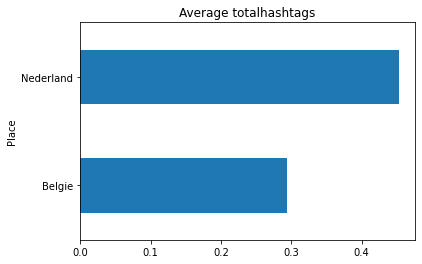

In [112]:
df_Nederland_en_Belgie.plot(kind = "barh", y = "mean", legend = False,
            title = "Average totalhashtags")

<AxesSubplot:title={'center':'Average totalhashtags'}, ylabel='Place'>

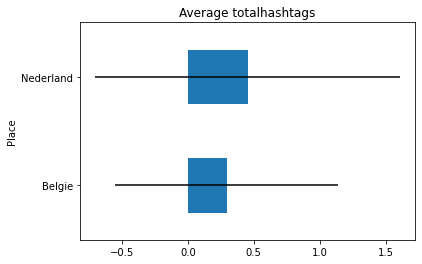

In [113]:
df_Nederland_en_Belgie.plot(kind = "barh", y = "mean", legend = False,
            title = "Average totalhashtags", xerr = "std")